In [2]:
import pandas as pd

# Update the path with the correct location of your train and test files
train_path = "train.csv"
test_path = "test.csv"


# Read the CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display the first few rows to verify
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
                                category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that she w...  

Test Dataset:
                                    category  \
0  RapeGang Rape RGRSexually Abusive Content   
1                     Online Financial Fraud   
2             Cyber A

In [3]:
train_df.head(10)

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
5,Online Financial Fraud,UPI Related Frauds,FRAUD \t UPI PAYTM \r\nBANK \tPunjab National ...
6,Online Financial Fraud,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...
7,Online Financial Fraud,Internet Banking Related Fraud,FINANCIAL FRAUD RS
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...


In [4]:
# Check the shape of the datasets
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

# Display column names and data types
print("\nTrain Dataset Info:")
print(train_df.info())

# Check for missing values
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())


Train Dataset Shape: (93686, 3)
Test Dataset Shape: (31229, 3)

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB
None

Missing Values in Train Dataset:
category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64


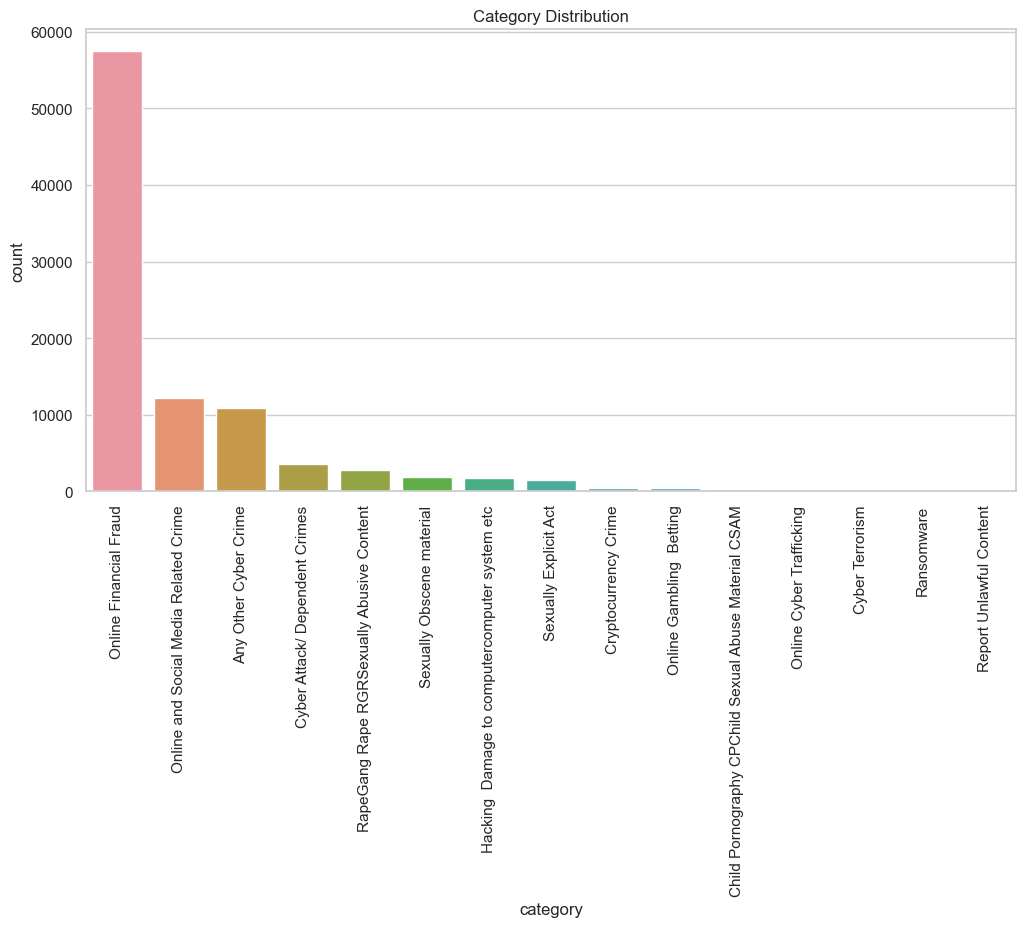

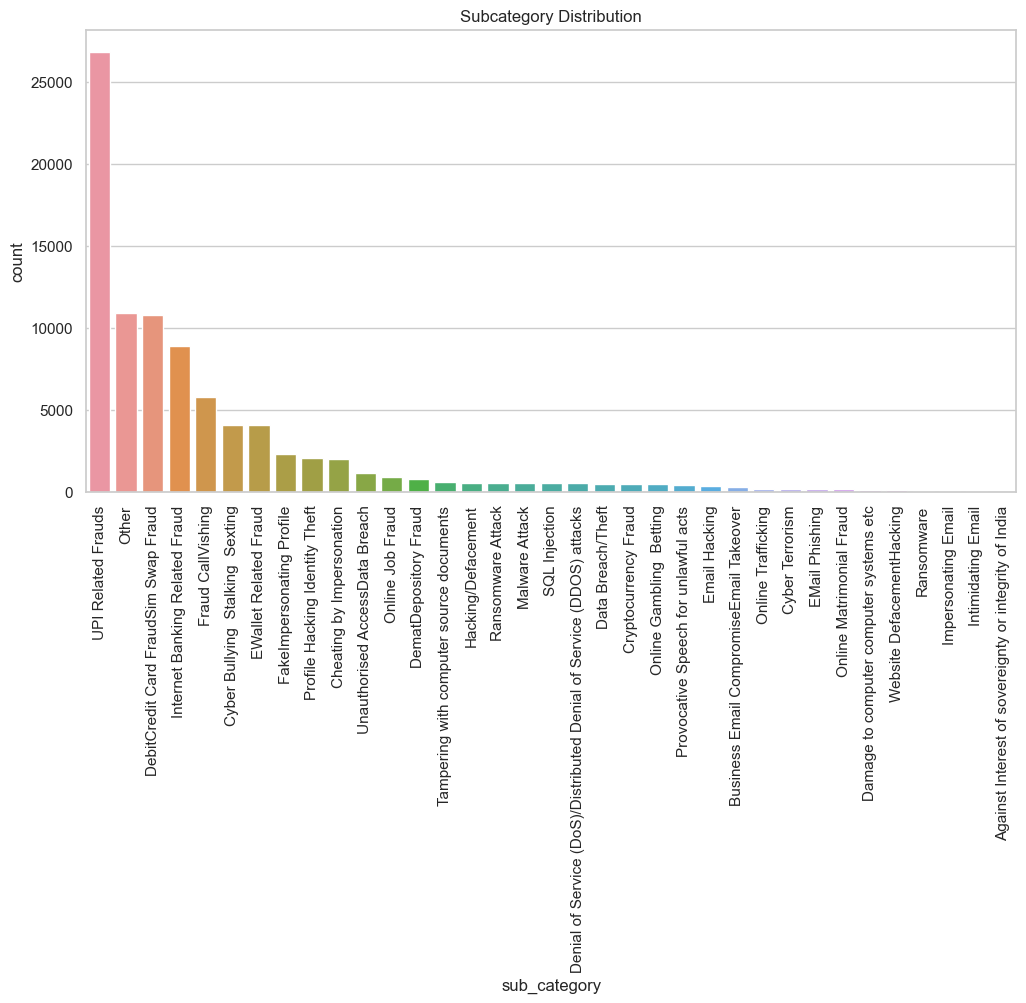

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Bar plot for category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='category', order=train_df['category'].value_counts().index)
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Bar plot for subcategory distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='sub_category', order=train_df['sub_category'].value_counts().index)
plt.title('Subcategory Distribution')
plt.xticks(rotation=90)
plt.show()


In [6]:
# Calculate the percentage of missing values in the train dataset
missing_percentage = train_df.isnull().sum() / len(train_df) * 100

# Display the missing values and their percentage
missing_values_summary = pd.DataFrame({
    'Missing Values': train_df.isnull().sum(),
    'Percentage': missing_percentage
})

print(missing_values_summary)


                    Missing Values  Percentage
category                         0    0.000000
sub_category                  6591    7.035203
crimeaditionalinfo              21    0.022415


# General Guidelines for Handling Missing Values





**0% to 5% Missing Values:**

Action: Usually acceptable to remove these rows or even drop the column if it's not critical.

**5% to 15% Missing Values:**

Action: Consider imputing missing values instead of removing them. If you remove rows, evaluate the impact on data integrity.


**15% to 30% Missing Values:**

Action: Carefully assess the importance of the column. If crucial, consider more sophisticated imputation techniques or predictive modeling to estimate missing values.


**Above 30% Missing Values: **

Action: Generally, it's better to drop the column unless you can gather more data or have a good method to impute missing values.


Since the the missing value percentage of crime additional info is negligible, we can choose to drop these rows without much impact on the dataset.

In [7]:
# Drop rows where 'crimeaditionalinfo' is missing
train_df = train_df.dropna(subset=['crimeaditionalinfo'])

# Display the shape of the cleaned dataset
print("Cleaned Train Dataset Shape:", train_df.shape)




Cleaned Train Dataset Shape: (93665, 3)


In [8]:
# Remove rows where 'crimeaditionalinfo' is missing
train_df = train_df.dropna(subset=['crimeaditionalinfo'])


print(train_df['crimeaditionalinfo'].isnull().sum())
print(train_df.shape)  # Check new shape to see number of rows after removal


0
(93665, 3)


We can fill missing sub-category values with the most frequent sub-category for each associated category.

In [9]:
grouped = train_df.groupby('category')['sub_category']
for name, group in grouped:
    if group.isnull().sum() > 0:
        mode_value = group.mode()
        print(f"Category: {name}, Mode: {mode_value.tolist()}, Missing Count: {group.isnull().sum()}")

Category: Child Pornography CPChild Sexual Abuse Material CSAM, Mode: [], Missing Count: 379
Category: RapeGang Rape RGRSexually Abusive Content, Mode: [], Missing Count: 2822
Category: Sexually Explicit Act, Mode: [], Missing Count: 1552
Category: Sexually Obscene material, Mode: [], Missing Count: 1838


In [10]:
# Create a list of categories with missing modes
missing_mode_categories = grouped.apply(lambda x: x.mode().empty).loc[lambda x: x].index.tolist()

# Print the categories with no mode
print("Categories with Missing Modes:")
print(missing_mode_categories)

# Define a fallback value for missing sub_category
fallback_value = 'Other'

# Fill missing values in sub_category for categories with no mode
train_df['sub_category'] = train_df.apply(
    lambda row: fallback_value if row['category'] in missing_mode_categories and pd.isnull(row['sub_category']) else row['sub_category'],
    axis=1
)

# Verify the changes
print("\nUpdated Train Dataset Missing Values:")
print(train_df.isnull().sum())

# Optional: Print the distribution of sub_category to confirm the fallback
print("\nSub-category Counts After Filling:")
print(train_df['sub_category'].value_counts())


Categories with Missing Modes:
['Child Pornography CPChild Sexual Abuse Material CSAM', 'RapeGang Rape RGRSexually Abusive Content', 'Sexually Explicit Act', 'Sexually Obscene material']

Updated Train Dataset Missing Values:
category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

Sub-category Counts After Filling:
sub_category
UPI Related Frauds                                                      26843
Other                                                                   17468
DebitCredit Card FraudSim Swap Fraud                                    10802
Internet Banking Related Fraud                                           8871
Fraud CallVishing                                                        5802
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
FakeImpersonating Profile                                                2299
Profile Hacking 

# Data Exploration and Visualization
In this section, we will perform data exploration and visualization to gain insights into the distribution of cybercrime categories and sub-categories within our dataset.

**Visualizing Category Distribution:** We will create a bar chart to illustrate the count of entries for each category in the dataset. This visualization will help us understand the overall distribution of different types of cyber crimes, allowing us to identify which categories are more prevalent.

**Visualizing Sub-category Distribution:** Similarly, we will generate a bar chart for the sub-category column. This will provide insights into the most and least common types of fraud or cyber crimes, further detailing the landscape of the dataset.

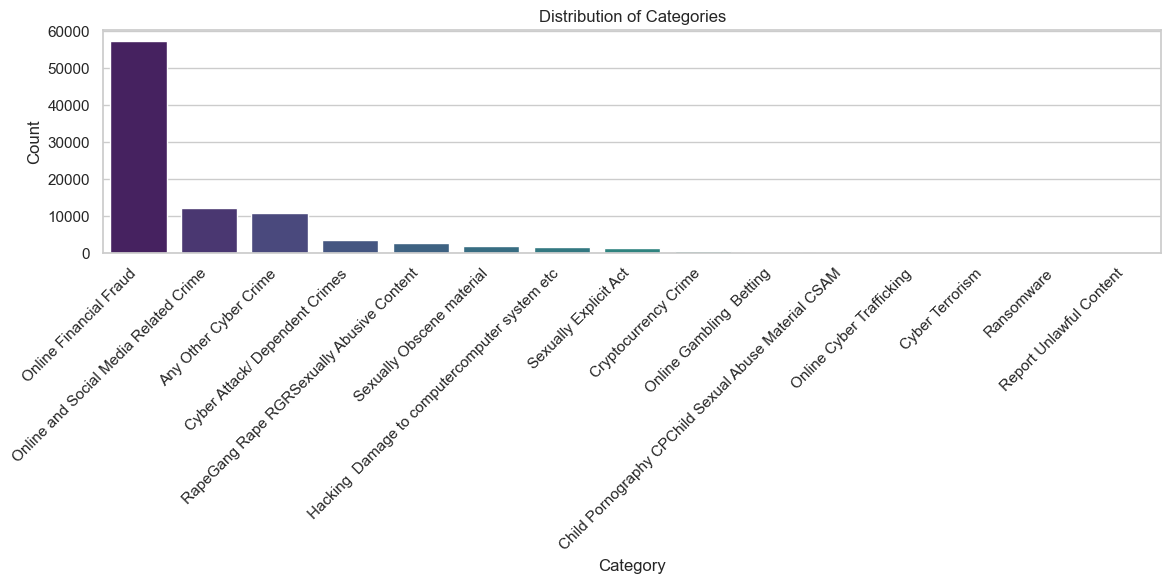

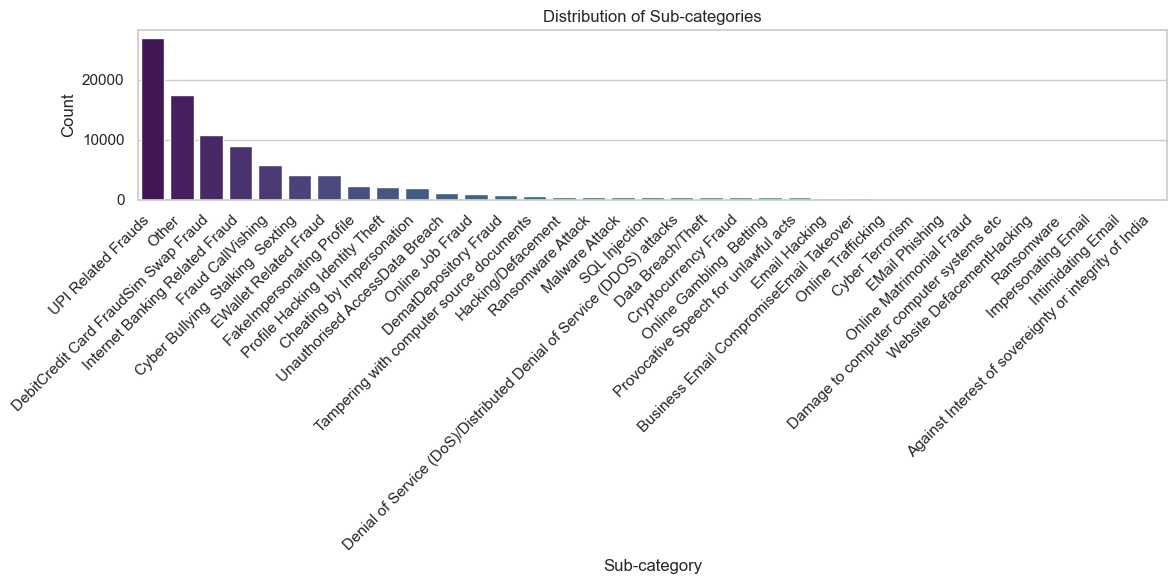

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Visualize Category Distribution
plt.figure(figsize=(12, 6))
category_counts = train_df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Sub-category Distribution
plt.figure(figsize=(12, 6))
sub_category_counts = train_df['sub_category'].value_counts()
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette="viridis")
plt.title('Distribution of Sub-categories')
plt.xlabel('Sub-category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Key Insights
**Online Financial Fraud:** The dominant category is Online Financial Fraud (57,416 cases), indicating a major area of concern.

**Social Media Crimes**: Online and Social Media Related Crime ranks second (12,138 cases), highlighting vulnerabilities on these platforms.

**Diverse Cybercrime Landscape:** The category Any Other Cyber Crime (10,877 cases) suggests emerging forms of cybercrime.

**Low Incidence of Severe Crimes:** Categories like Ransomware (56 cases) and Child Pornography/CP (379 cases) are less frequent but require serious attention.

**Concentration in Specific Sub-categories:** The sub-category UPI Related Frauds (26,843 cases) indicates a significant focus area for prevention.

In [30]:
# Display Category Distribution
category_counts = train_df['category'].value_counts()
print("Category Distribution:")
print(category_counts)

# Display Sub-category Distribution
sub_category_counts = train_df['sub_category'].value_counts()
print("\nSub-category Distribution:")
print(sub_category_counts)


Category Distribution:
category
Online Financial Fraud                                  57416
Online and Social Media Related Crime                   12138
Any Other Cyber Crime                                   10877
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

Sub-categor

C:\Users\riyaz\AppData\Local\Temp\ipykernel_22268\2018140504.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make space for labels


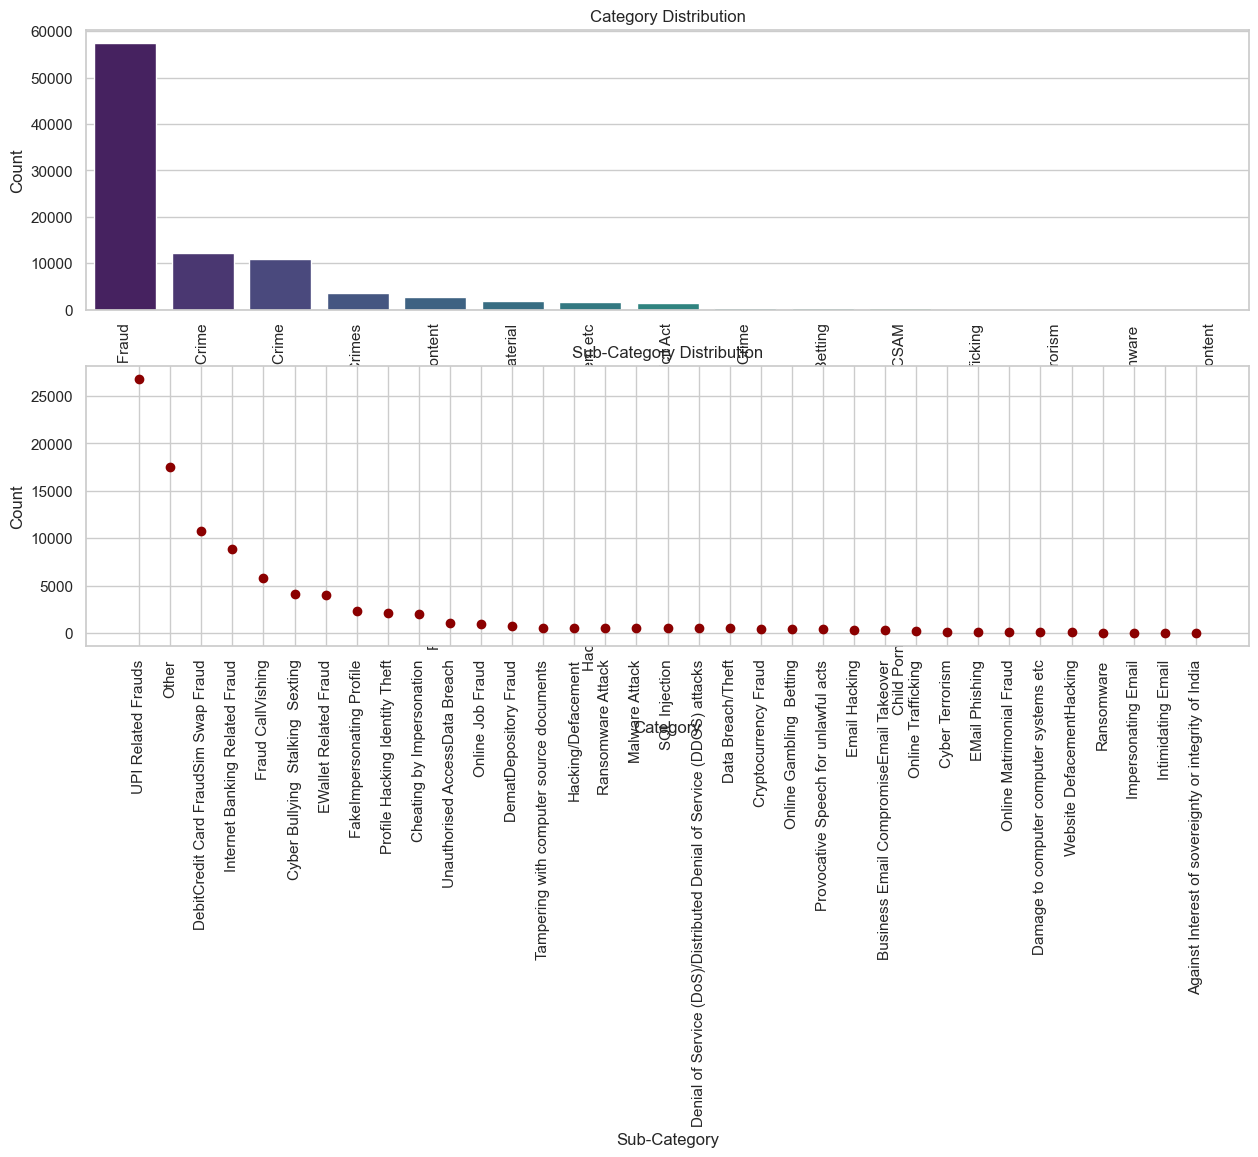

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))

# Bar plot for category distribution
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
category_counts = train_df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.ylabel('Count')
plt.xlabel('Category')

# Scatter plot for sub-category distribution
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
sub_category_counts = train_df['sub_category'].value_counts()
plt.scatter(sub_category_counts.index, sub_category_counts.values, color='darkred')
plt.xticks(rotation=90)
plt.title('Sub-Category Distribution')
plt.ylabel('Count')
plt.xlabel('Sub-Category')

plt.tight_layout()  # Adjust layout to make space for labels
plt.show()


### Addressing Class Imbalance in the Dataset

Our dataset presents a significant class imbalance in both the `category` and `sub_category` columns, which could lead to a model biased toward predicting the majority classes. Without addressing this issue, the model might perform poorly on underrepresented classes, frequently predicting the most common categories and subcategories, thus reducing the overall effectiveness of the model.

---

### Imbalance Challenges

- **Major Categories**:  
  - **Online Financial Fraud**: 57,416 instances  
  - **UPI Related Frauds**: 26,843 instances  

- **Minor Categories**:  
  - **Cyber Terrorism**: 161 instances  
  - **Ransomware**: 56 instances  
  - **Report Unlawful Content**: 1 instance  

This imbalance could make it difficult for the model to learn meaningful patterns for less frequent categories, as the more abundant classes could dominate the learning process.

---

### Strategy for Undersampling

Our approach focuses on undersampling the most dominant class in the `category` column, **"Online Financial Fraud"**, while preserving the **"UPI Related Frauds"** as it is. We aim to maintain a balance where the dataset’s structure is still reflective of real-world distribution but does not excessively skew toward the majority class.

#### Key Adjustments:
1. **Undersample "Online Financial Fraud"**:  
   - **Before**: 57,416 instances  
   - **Target size**: Reduced to 15,000–30,000 instances

2. **Preserve "UPI Related Frauds"**:  
   - **No Change**: 26,843 instances (we will not undersample this class)

3. **Remove Classes with Only One Instance**:  
   - **Removed**: "Report Unlawful Content" (1 instance)

This approach will allow us to focus on balancing the dataset by reducing the dominance of the "Online Financial Fraud" category while ensuring that smaller categories still have enough representation.

---

### Target Size Adjustments

- **Online Financial Fraud**: Reduce to 15,000–30,000 instances
- **UPI Related Frauds**: Keep at 26,843 instances

These adjustments should lower the dominance of the "Online Financial Fraud" category while maintaining a balanced distribution across the dataset, enabling the model to better learn from the minority classes.


In [57]:
import pandas as pd

# Assuming your data is in the `train_df` DataFrame

# Define the target size for undersampling
category_target_size = 25000  # Adjust the target size for 'Online Financial Fraud'

# 1. Undersample 'Online Financial Fraud' in the 'category' column
# Filter the 'Online Financial Fraud' class and sample down to the target size
online_financial_fraud_data = train_df[train_df['category'] == 'Online Financial Fraud'].sample(
    n=category_target_size, random_state=42
)

# Keep the rest of the data unchanged
remaining_category_data = train_df[train_df['category'] != 'Online Financial Fraud']

# Combine the undersampled 'Online Financial Fraud' data with the rest of the data
undersampled_df = pd.concat([online_financial_fraud_data, remaining_category_data])

# 2. Shuffle the rows of the undersampled DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Clean the 'crimeaditionalinfo' column for unwanted characters like newlines and tabs
undersampled_df['crimeaditionalinfo'] = undersampled_df['crimeaditionalinfo'].str.replace(r'[\r\n\t]+', ' ', regex=True).str.strip()

# Check the new distribution
print("Undersampled Category Distribution:")
print(undersampled_df['category'].value_counts())

# Check the first few rows to ensure proper cleaning and shuffling
print(undersampled_df.head())


Undersampled Category Distribution:
category
Online Financial Fraud                                  25000
Online and Social Media Related Crime                   12138
Any Other Cyber Crime                                   10877
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [58]:
# Remove the class with a single instance from the 'category' column
cleaned_df = undersampled_df[undersampled_df['sub_category'] != 'Against Interest of sovereignty or integrity of India']
cleaned_df = undersampled_df[undersampled_df['category'] != 'Report Unlawful Content']

# Check the updated distribution to ensure the class has been removed
print("\nUpdated Category Distribution (after removing single-instance class):")
print(cleaned_df['category'].value_counts())
print(cleaned_df['sub_category'].value_counts())



Updated Category Distribution (after removing single-instance class):
category
Online Financial Fraud                                  25000
Online and Social Media Related Crime                   12138
Any Other Cyber Crime                                   10877
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Name: count, dtype: int64
sub_category
Other        

In [65]:
cleaned_df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
crime_info_length     0
victim_type           0
dtype: int64

In [37]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


### Analyze Crime Information

In this section, we will generate a word cloud from the `crimeaditionalinfo` column of our dataset. The word cloud visualization will help us identify the most frequently occurring words and phrases in the complaints. This analysis provides insights into common themes or issues reported, allowing us to understand the nature of the crimes better.


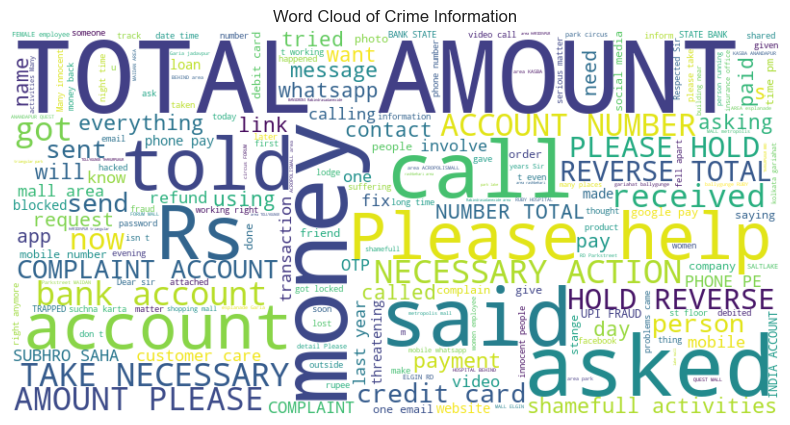

In [38]:
# Import necessary libraries for visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in the crimeaditionalinfo column into a single string
text = ' '.join(train_df['crimeaditionalinfo'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Crime Information')
plt.show()


### Key Insights from the Word Cloud

 Frequent keywords like "TOTAL," "AMOUNT," "NECESSARY ACTION," "account," and "money" highlight recurring issues related to financial fraud and the urgency for resolution. Additionally, phrases such as "please help," "reverse," "asked," and "told" indicate common communication patterns between victims and service providers, often involving requests for assistance, refunds, or reversals of unauthorized transactions. These insights suggest a prevalent concern with financial security and the challenges faced by victims in addressing their complaints.


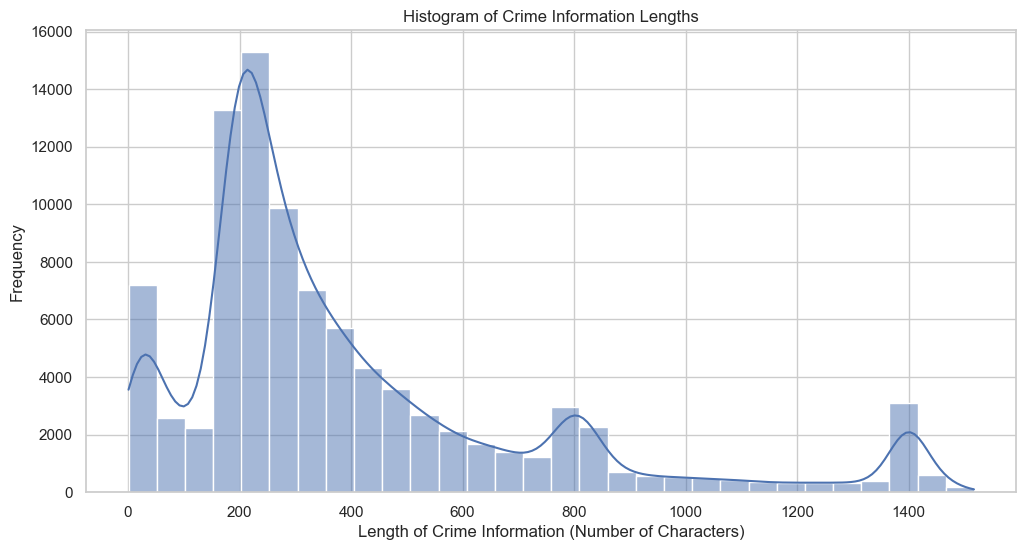

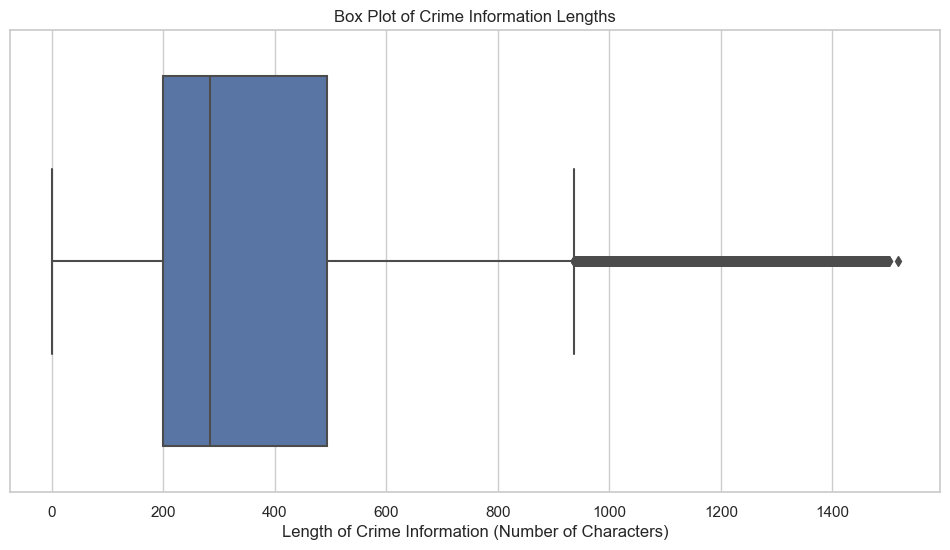

mean     398.365772
50%      284.000000
std      329.303728
min        1.000000
max     1517.000000
Name: crime_info_length, dtype: float64

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each entry in the 'crimeaditionalinfo' column
train_df['crime_info_length'] = train_df['crimeaditionalinfo'].str.len()

# Create a histogram to visualize the distribution of lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_df['crime_info_length'], bins=30, kde=True)
plt.title('Histogram of Crime Information Lengths')
plt.xlabel('Length of Crime Information (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

# Create a box plot to visualize the distribution of lengths
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['crime_info_length'])
plt.title('Box Plot of Crime Information Lengths')
plt.xlabel('Length of Crime Information (Number of Characters)')
plt.show()

# Calculate descriptive statistics for the lengths
length_stats = train_df['crime_info_length'].describe()
length_stats.loc[['mean', '50%', 'std', 'min', 'max']]


# Data Preparation for Victim Classification
In this step, we aim to enhance our dataset by classifying the type of victim based on the content of the crimeaditionalinfo column. This classification will help us differentiate between individuals and organizations that may be involved in the complaints.

In [67]:

# Function to classify victim type
def classify_victim_type(info):
    # Lowercase the input to make the check case-insensitive
    info = info.lower()
    # Define keywords for classification
    individual_keywords = ['i', 'my', 'me', 'individual', 'person']
    organization_keywords = ['company', 'organization', 'business', 'firm', 'corporation']

    # Check for keywords and classify accordingly
    if any(keyword in info for keyword in individual_keywords):
        return 'Individual'
    elif any(keyword in info for keyword in organization_keywords):
        return 'Organization'
    else:
        return 'Unknown'  # For entries that don't match any category

# Apply the classification function to the 'crimeaditionalinfo' column

cleaned_df.loc[:, 'victim_type'] = cleaned_df['crimeaditionalinfo'].apply(classify_victim_type)


# Check for missing values in the new victim_type column
missing_victims = cleaned_df['victim_type'].isnull().sum()
print(f'Missing victim type entries: {missing_victims}')

# Display the updated DataFrame with the new victim_type column
print(cleaned_df[['crimeaditionalinfo', 'victim_type']].head())


Missing victim type entries: 0
                                  crimeaditionalinfo victim_type
0  rsir name hari shriram singh even one person c...  Individual
1  receiv call pm th februari told credit account...  Individual
2  fraud debit card bank union bank india includ ...  Individual
3  receiv call person told call naukricom ask pay...  Individual
4  respect sir seriou matter want inform person r...  Individual


In [61]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('stopwords')

# Text Preprocessing Steps
**Tokenization:** We broke down the crimeaditionalinfo entries into individual words or tokens. This step helps us analyze the text at a granular level, facilitating further processing.

**Stop Word Removal:** We filtered out common stop words (e.g., "the," "is," "and") from our tokenized data. Removing these words reduces noise in the dataset and enhances the focus on meaningful terms relevant to the complaints.

**Stemming:** We applied stemming to the filtered tokens, converting words to their root forms (e.g., "running" becomes "run"). This process standardizes the words and reduces dimensionality, making the data more manageable for analysis.



In [62]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lower case

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Keep only alphabetic words

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)  # Join tokens back into a string


In [68]:
# Preprocess the 'crimeaditionalinfo' column
cleaned_df.loc[:, 'crimeaditionalinfo'] = cleaned_df['crimeaditionalinfo'].fillna('').apply(preprocess_text)


In [71]:
# Display the updated DataFrame
cleaned_df.head()  # Show the first few rows


,category,sub_category,crimeaditionalinfo,crime_info_length,victim_type
0,Online Financial Fraud,Fraud CallVishing,rsir name hari shriram singh even one person c...,839,Individual
1,Online Financial Fraud,UPI Related Frauds,receiv call pm th februari told credit account...,509,Individual
2,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,fraud debit card bank union bank india includ ...,222,Individual
3,Any Other Cyber Crime,Other,receiv call person told call naukricom ask pay...,367,Individual
4,RapeGang Rape RGRSexually Abusive Content,Other,respect sir seriou matter want inform person r...,1400,Individual


In [73]:
test_df.head()
test_df.isnull().sum()

category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

In [77]:
# Drop rows where 'crimeaditionalinfo' is missing
test_df = test_df.dropna(subset=['crimeaditionalinfo'])

In [78]:
grouped = test_df.groupby('category')['sub_category']
for name, group in grouped:
    if group.isnull().sum() > 0:
        mode_value = group.mode()
        print(f"Category: {name}, Mode: {mode_value.tolist()}, Missing Count: {group.isnull().sum()}")

Category: Any Other Cyber Crime, Mode: ['UPI Related Frauds'], Missing Count: 2
Category: Online Financial Fraud, Mode: ['UPI Related Frauds'], Missing Count: 2
Category: Online and Social Media Related Crime, Mode: ['UPI Related Frauds'], Missing Count: 2


In [79]:
# Create a list of categories with missing modes
missing_mode_categories = grouped.apply(lambda x: x.mode().empty).loc[lambda x: x].index.tolist()

# Print the categories with no mode
print("Categories with Missing Modes:")
print(missing_mode_categories)

# Define a fallback value for missing sub_category
fallback_value = 'Other'

# Fill missing values in sub_category for categories with no mode
test_df['sub_category'] = train_df.apply(
    lambda row: fallback_value if row['category'] in missing_mode_categories and pd.isnull(row['sub_category']) else row['sub_category'],
    axis=1
)

# Verify the changes
print("\nUpdated Test Dataset Missing Values:")
print(test_df.isnull().sum())

# Optional: Print the distribution of sub_category to confirm the fallback
print("\nSub-category Counts After Filling:")
print(test_df['sub_category'].value_counts())


Categories with Missing Modes:
[]

Updated Test Dataset Missing Values:
category              0
sub_category          6
crimeaditionalinfo    0
dtype: int64

Sub-category Counts After Filling:
sub_category
UPI Related Frauds                                                      8842
Other                                                                   5862
DebitCredit Card FraudSim Swap Fraud                                    3570
Internet Banking Related Fraud                                          2990
Fraud CallVishing                                                       1907
EWallet Related Fraud                                                   1357
Cyber Bullying  Stalking  Sexting                                       1331
FakeImpersonating Profile                                                803
Cheating by Impersonation                                                695
Profile Hacking Identity Theft                                           672
Unauthorised AccessData 

In [80]:
# Drop rows where 'crimeaditionalinfo' is missing
test_df = test_df.dropna(subset=['sub_category'])

In [84]:

# Function to classify victim type
def classify_victim_type(info):
    # Lowercase the input to make the check case-insensitive
    info = info.lower()
    # Define keywords for classification
    individual_keywords = ['i', 'my', 'me', 'individual', 'person']
    organization_keywords = ['company', 'organization', 'business', 'firm', 'corporation']

    # Check for keywords and classify accordingly
    if any(keyword in info for keyword in individual_keywords):
        return 'Individual'
    elif any(keyword in info for keyword in organization_keywords):
        return 'Organization'
    else:
        return 'Unknown'  # For entries that don't match any category

# Apply the classification function to the 'crimeaditionalinfo' column

test_df.loc[:, 'victim_type'] = test_df['crimeaditionalinfo'].apply(classify_victim_type)


# Check for missing values in the new victim_type column
missing_victims = test_df['victim_type'].isnull().sum()
print(f'Missing victim type entries: {missing_victims}')

# Display the updated DataFrame with the new victim_type column
print(test_df[['crimeaditionalinfo', 'victim_type']].head())


Missing victim type entries: 0
                                  crimeaditionalinfo victim_type
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...  Individual
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT  Individual
2  The issue actually started when I got this ema...  Individual
3  I am amit kumar from karwi chitrakoot I am tot...  Individual
4  I have ordered  saree and  blouse from rinki s...  Individual


In [113]:
cleaned_df.head()

,category,sub_category,crimeaditionalinfo,crime_info_length,victim_type
0,Online Financial Fraud,Fraud CallVishing,rsir name hari shriram singh even one person c...,839,Individual
1,Online Financial Fraud,UPI Related Frauds,receiv call pm th februari told credit account...,509,Individual
2,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,fraud debit card bank union bank india includ ...,222,Individual
3,Any Other Cyber Crime,Other,receiv call person told call naukricom ask pay...,367,Individual
4,RapeGang Rape RGRSexually Abusive Content,Other,respect sir seriou matter want inform person r...,1400,Individual


In [122]:
# Step 1: Prepare the data
# Features (X)
x_train = cleaned_df[['crimeaditionalinfo']]

# Targets (y)
y_train = cleaned_df[['category', 'sub_category', 'victim_type']]


# Features (X)
x_test = cleaned_df[['crimeaditionalinfo']]

# Targets (y)
y_test = cleaned_df[['category', 'sub_category', 'victim_type']]



### TF-IDF Vectorization

In this step, we are applying **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization to transform the text data into numerical features. 


- We are using `TfidfVectorizer` to convert the text data (from both the training and test sets) into a sparse matrix of numerical features.
- The vectorizer is fitted on the training data, learning the vocabulary and term importance, and then it transforms both the training and test data into their respective TF-IDF representations.

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the train data (x_train)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data (x_test) using the same vocabulary learned from the train set
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Check the shape of the resulting TF-IDF matrices
print("X_train_tfidf shape:", x_train_tfidf.shape)  # Should be (number_of_train_samples, 5000)
print("X_test_tfidf shape:", x_test_tfidf.shape)    # Should be (number_of_test_samples, 5000)


X_train_tfidf shape: (61248, 5000)
X_test_tfidf shape: (61248, 5000)


### Label Encoding

In this step, we are encoding categorical target variables into numeric labels using **Label Encoding**. This transformation is necessary for machine learning models, which typically require numerical inputs and outputs.




In [140]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize LabelEncoders
category_encoder = LabelEncoder()
sub_category_encoder = LabelEncoder()
victim_type_encoder = LabelEncoder()

# Apply encoding to each target column

y_train.loc[:, 'category'] = category_encoder.fit_transform(y_train['category'])
y_train.loc[:, 'sub_category'] = sub_category_encoder.fit_transform(y_train['sub_category'])
y_train.loc[:, 'victim_type'] = victim_type_encoder.fit_transform(y_train['victim_type'])

# Ensure the data types are now integers
print(y_train.dtypes)  # Should show int64 for all columns
print(y_train.head())   # Check a few rows to verify encoding


category        int64
sub_category    int64
victim_type     int64
dtype: object
   category  sub_category  victim_type
0         7            14            0
1         7            31            0
2         7             7            0
3         0            24            0
4        11            24            0


We will be training our data on Random forest

**Why Random Forest?**

Random Forest is an ensemble learning algorithm that constructs multiple decision trees and aggregates their results to make robust predictions. It is particularly effective for high-dimensional data, like our text data transformed using TF-IDF, as it efficiently handles large feature spaces. The algorithm reduces the risk of overfitting by averaging the outcomes from various trees, ensuring better generalization to unseen data.

Given that our dataset is imbalanced across different categories, sub-categories, and victim types, we have employed the `class_weight='balanced'` parameter. This setting helps to adjust for class imbalances by giving more weight to underrepresented classes, thus improving the model's ability to correctly predict minority class instances. Overall, Random Forest provides a strong, flexible approach to multi-output classification, accommodating the complexity of our crime data.

In [141]:
from sklearn.ensemble import RandomForestClassifier
import mlflow
import mlflow.sklearn

# Initialize RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


Setting up MLFlow

In [142]:
# Set the MLflow experiment
mlflow.set_experiment("Crime-Categorization")
# Start an MLflow run to track this experiment
with mlflow.start_run():
    # Your code for training the model will go here
    pass


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the RandomForest model with specified parameters
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Initialize MultiOutputClassifier to handle multiple target columns
multi_output_rf = MultiOutputClassifier(rf, n_jobs=-1)

# Train the model
multi_output_rf.fit(x_train_tfidf, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42),
                      n_jobs=-1)

In [149]:
# Ensure the columns are of type int64
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [150]:
# Make predictions on the test set
y_pred = multi_output_rf.predict(x_test_tfidf)


Logging metrics in MLflow

In [156]:

y_pred_category = y_pred[:, 0]
y_pred_sub_category = y_pred[:, 1]
y_pred_victim_type = y_pred[:, 2]

# Calculate metrics for 'category'
accuracy_category = accuracy_score(y_test['category'], y_pred_category)
precision_category = precision_score(y_test['category'], y_pred_category, average='weighted')
recall_category = recall_score(y_test['category'], y_pred_category, average='weighted')
f1_score_category = f1_score(y_test['category'], y_pred_category, average='weighted')

# Calculate metrics for 'sub_category'
accuracy_sub_category = accuracy_score(y_test['sub_category'], y_pred_sub_category)
precision_sub_category = precision_score(y_test['sub_category'], y_pred_sub_category, average='weighted')
recall_sub_category = recall_score(y_test['sub_category'], y_pred_sub_category, average='weighted')
f1_score_sub_category = f1_score(y_test['sub_category'], y_pred_sub_category, average='weighted')

# Calculate metrics for 'victim_type'
accuracy_victim_type = accuracy_score(y_test['victim_type'], y_pred_victim_type)
precision_victim_type = precision_score(y_test['victim_type'], y_pred_victim_type, average='weighted')
recall_victim_type = recall_score(y_test['victim_type'], y_pred_victim_type, average='weighted')
f1_score_victim_type = f1_score(y_test['victim_type'], y_pred_victim_type, average='weighted')


    # Log metrics for category
mlflow.log_metric("Accuracy_Category", accuracy_category)
mlflow.log_metric("Precision_Category", precision_category)
mlflow.log_metric("Recall_Category", recall_category)
mlflow.log_metric("F1_Score_Category", f1_score_category)

    # Log metrics for sub_category
mlflow.log_metric("Accuracy_Sub_category", accuracy_sub_category)
mlflow.log_metric("Precision_Sub_category", precision_sub_category)
mlflow.log_metric("Recall_Sub_category", recall_sub_category)
mlflow.log_metric("F1_Score_Sub_category", f1_score_sub_category)

    # Log metrics for victim_type
mlflow.log_metric("Accuracy_Victim_type", accuracy_victim_type)
mlflow.log_metric("Precision_Victim_type", precision_victim_type)
mlflow.log_metric("Recall_Victim_type", recall_victim_type)
mlflow.log_metric("F1_Score_Victim_type", f1_score_victim_type)

In [157]:
# Print the evaluation metrics for category
print(f"Accuracy - Category: {accuracy_category}")
print(f"Precision - Category: {precision_category}")
print(f"Recall - Category: {recall_category}")
print(f"F1-Score - Category: {f1_score_category}")

# Print the evaluation metrics for sub_category
print(f"Accuracy - Sub_category: {accuracy_sub_category}")
print(f"Precision - Sub_category: {precision_sub_category}")
print(f"Recall - Sub_category: {recall_sub_category}")
print(f"F1-Score - Sub_category: {f1_score_sub_category}")

# Print the evaluation metrics for victim_type
print(f"Accuracy - Victim_type: {accuracy_victim_type}")
print(f"Precision - Victim_type: {precision_victim_type}")
print(f"Recall - Victim_type: {recall_victim_type}")
print(f"F1-Score - Victim_type: {f1_score_victim_type}")


Accuracy - Category: 0.982432079414838
Precision - Category: 0.9949587320118322
Recall - Category: 0.982432079414838
F1-Score - Category: 0.9877312961847784
Accuracy - Sub_category: 0.9692561389759665
Precision - Sub_category: 0.9792219554149966
Recall - Sub_category: 0.9692561389759665
F1-Score - Sub_category: 0.9729278698010061
Accuracy - Victim_type: 0.90339276384535
Precision - Victim_type: 0.9604976561156591
Recall - Victim_type: 0.90339276384535
F1-Score - Victim_type: 0.928329465034579


### Model Evaluation Metrics

In this section, we are reporting the performance of the multi-output classification model across three different categories: `Category`, `Sub_category`, and `Victim_type`. We use metrics such as **Accuracy**, **Precision**, **Recall**, and **F1-Score** to assess the effectiveness of the model for each output.

#### Evaluation Results:

1. **Category Classification:**
   - **Accuracy:** 0.9824
   - **Precision:** 0.9950
   - **Recall:** 0.9824
   - **F1-Score:** 0.9877

   **Interpretation:** 
   - The model demonstrates high performance in classifying the main `Category` of complaints. An accuracy of 98.24% indicates that most predictions are correct.
   - The precision of 99.50% signifies that the model is highly reliable in minimizing false positives.
   - The recall of 98.24% shows that the model is successful in capturing a high proportion of actual positive cases.
   - The F1-Score, which balances precision and recall, is also very strong, indicating an overall robust performance for `Category`.

2. **Sub_category Classification:**
   - **Accuracy:** 0.9693
   - **Precision:** 0.9792
   - **Recall:** 0.9693
   - **F1-Score:** 0.9729

   **Interpretation:**
   - The model performs well in classifying the `Sub_category` with an accuracy of 96.93%.
   - A precision of 97.92% means the model is effective in reducing the number of false positives.
   - The recall of 96.93% reflects the model’s ability to correctly identify true positive cases.
   - The F1-Score of 97.29% suggests a well-balanced performance between precision and recall for `Sub_category`.

3. **Victim_type Classification:**
   - **Accuracy:** 0.9034
   - **Precision:** 0.9605
   - **Recall:** 0.9034
   - **F1-Score:** 0.9283

   **Interpretation:**
   - The model shows good performance for `Victim_type` classification, with an accuracy of 90.34%.
   - A precision of 96.05% indicates a strong ability to avoid false positives.
   - The recall of 90.34% demonstrates that the model can correctly identify most true cases, although there is some room for improvement.
   - The F1-Score of 92.83% reveals a reasonable balance between precision and recall, although it is slightly lower compared to `Category` and `Sub_category`.

#### Overall Analysis:
- The model performs exceptionally well in the `Category` and `Sub_category` classifications with very high precision, recall, and F1-Scores.
- While the `Victim_type` classification is strong, it has comparatively lower metrics, suggesting that there may be room for improvement in capturing true cases more effectively.
- These results indicate that the model is well-optimized for handling the imbalanced nature of the data, though further tuning or data augmentation may enhance performance, especially for `Victim_type`.

We use **confusion matrices** to visually evaluate the performance of our model

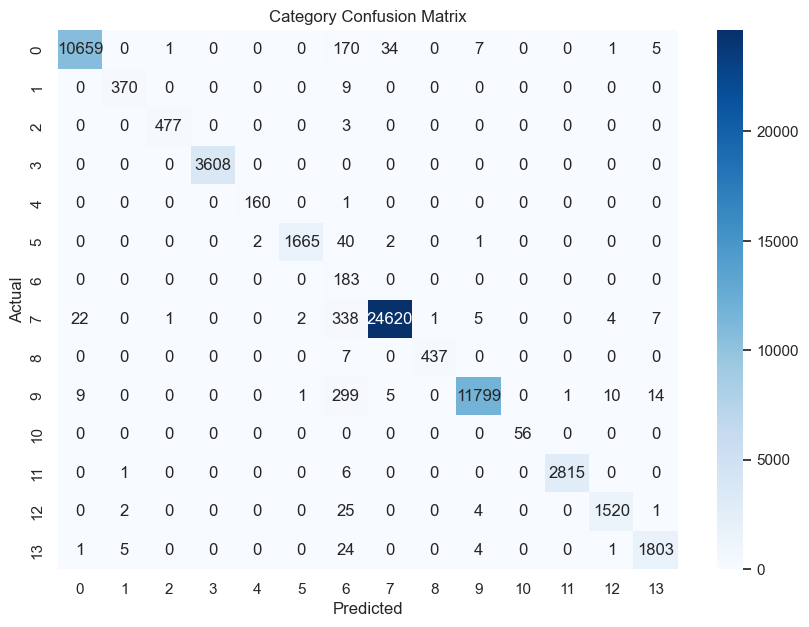

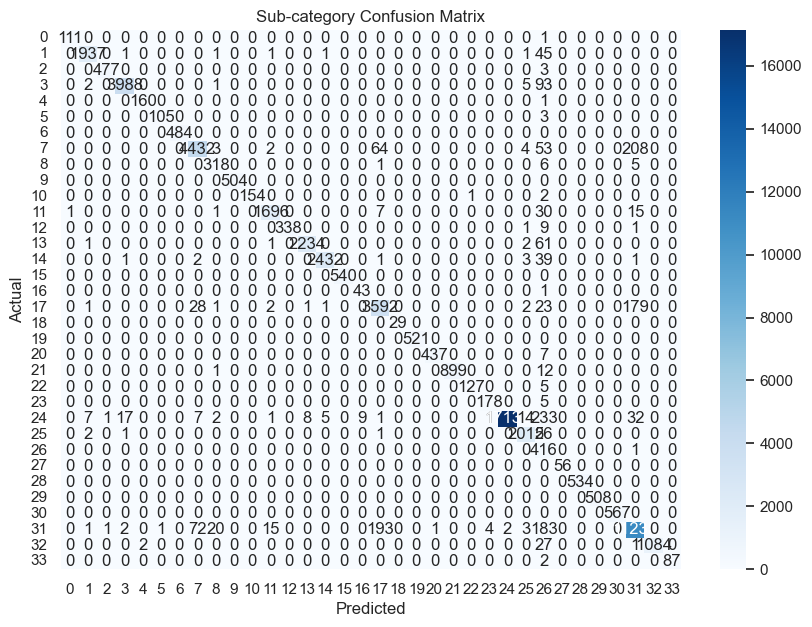

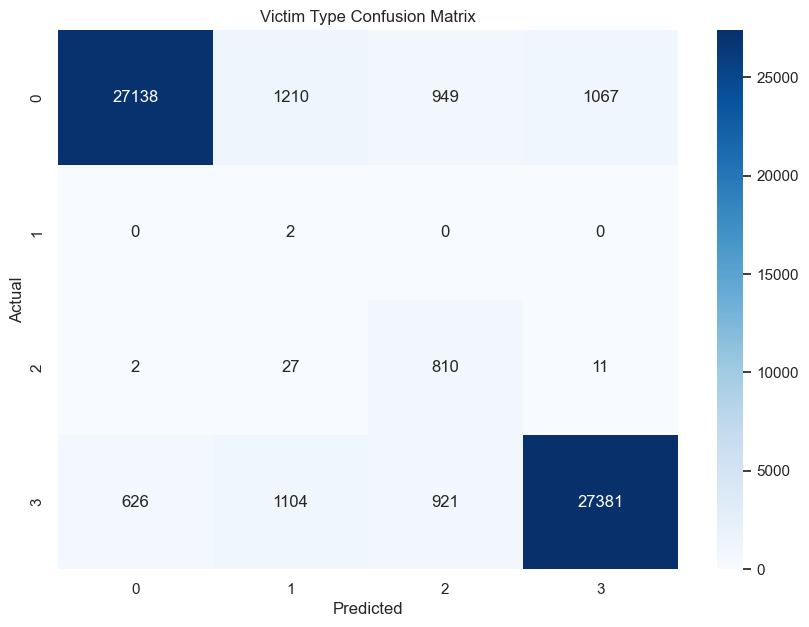

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = multi_output_rf.predict(x_test_tfidf)

# Category Confusion Matrix
cm_category = confusion_matrix(y_test['category'], y_pred[:, 0])
# Sub-category Confusion Matrix
cm_sub_category = confusion_matrix(y_test['sub_category'], y_pred[:, 1])
# Victim Type Confusion Matrix
cm_victim_type = confusion_matrix(y_test['victim_type'], y_pred[:, 2])

# Plot Category Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_category, annot=True, fmt="d", cmap="Blues", xticklabels=category_encoder.classes_, yticklabels=category_encoder.classes_)
plt.title('Category Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Sub-category Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_sub_category, annot=True, fmt="d", cmap="Blues", xticklabels=sub_category_encoder.classes_, yticklabels=sub_category_encoder.classes_)
plt.title('Sub-category Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Victim Type Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_victim_type, annot=True, fmt="d", cmap="Blues", xticklabels=victim_type_encoder.classes_, yticklabels=victim_type_encoder.classes_)
plt.title('Victim Type Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Saving the trained model

In [158]:
import joblib

# Save the trained MultiOutputClassifier model to a file
joblib.dump(multi_output_rf, 'multi_output_rf_model.joblib')

# Optionally, save the TF-IDF vectorizer to use the same transformations on new data
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

***Prediction using our model***

In [2]:
import joblib
# Load the saved MultiOutputClassifier model
loaded_model = joblib.load('multi_output_rf_model.joblib')

# Load the saved TF-IDF vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')


In [4]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare new data (e.g., a new complaint)
new_data = ["spam message i recieve msg from unwanted number they say you take loan and today is repayment date but i did not take loan"]

# Transform the new data using the same TF-IDF vectorizer
new_data_tfidf = loaded_vectorizer.transform(new_data)

# Use the loaded model to predict on the transformed new data
predictions = loaded_model.predict(new_data_tfidf)

# Define the mappings for each target variable
category_mapping = {
    0: "Online Financial Fraud",
    1: "Online and Social Media Related Crime",
    2: "Any Other Cyber Crime",
    3: "Cyber Attack/ Dependent Crimes",
    4: "RapeGang Rape RGRSexually Abusive Content",
    5: "Sexually Obscene material",
    6: "Hacking  Damage to computercomputer system etc",
    7: "Sexually Explicit Act",
    8: "Cryptocurrency Crime",
    9: "Online Gambling  Betting",
    10: "Child Pornography CPChild Sexual Abuse Material CSAM",
    11: "Online Cyber Trafficking",
    12: "Cyber Terrorism",
    13: "Ransomware"
}

sub_category_mapping = {
    0: "Other",
    1: "UPI Related Frauds",
    2: "DebitCredit Card FraudSim Swap Fraud",
    3: "Cyber Bullying  Stalking  Sexting",
    4: "Internet Banking Related Fraud",
    5: "Fraud CallVishing",
    6: "FakeImpersonating Profile",
    7: "Profile Hacking Identity Theft",
    8: "Cheating by Impersonation",
    9: "EWallet Related Fraud",
    10: "Unauthorised AccessData Breach",
    11: "Online Job Fraud",
    12: "Tampering with computer source documents",
    13: "Hacking/Defacement",
    14: "Ransomware Attack",
    15: "Malware Attack",
    16: "SQL Injection",
    17: "Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks",
    18: "Data Breach/Theft",
    19: "Cryptocurrency Fraud",
    20: "Online Gambling  Betting",
    21: "Provocative Speech for unlawful acts",
    22: "Email Hacking",
    23: "DematDepository Fraud",
    24: "Online Trafficking",
    25: "Cyber Terrorism",
    26: "EMail Phishing",
    27: "Online Matrimonial Fraud",
    28: "Business Email CompromiseEmail Takeover",
    29: "Damage to computer computer systems etc",
    30: "Website DefacementHacking",
    31: "Ransomware",
    32: "Impersonating Email",
    33: "Intimidating Email"
}

victim_type_mapping = {
    0: "Individual",
    1: "Organization",
    2: "Unknown"
}

# Decode the predictions using the mappings
predicted_category_label = category_mapping[predictions[0][0]]
predicted_sub_category_label = sub_category_mapping[predictions[0][1]]
predicted_victim_type_label = victim_type_mapping[predictions[0][2]]

# Print the human-readable labels
print("Predicted Category:", predicted_category_label)
print("Predicted Sub-category:", predicted_sub_category_label)
print("Predicted Victim Type:", predicted_victim_type_label)


Predicted Category: Online Financial Fraud
Predicted Sub-category: Online Trafficking
Predicted Victim Type: Individual
